In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-defaulter/application_data.csv
/kaggle/input/loan-defaulter/previous_application.csv
/kaggle/input/loan-defaulter/columns_description.csv
/kaggle/input/auto-sales-data/Auto Sales data.csv
/kaggle/input/playgrounds4e06originaldata/original.csv


In [2]:
# Packages that we neeed in EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loan-defaulter data

In [3]:
# creating variables for application data and columns description 
df = pd.read_csv('/kaggle/input/loan-defaulter/application_data.csv')
col_desc = pd.read_csv('/kaggle/input/loan-defaulter/columns_description.csv')

In [4]:
# Shape of column Description
col_desc.shape

(160, 5)

In [5]:
# Column discription
col_desc

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
...,...,...,...,...,...
155,209,previous_application.csv,DAYS_FIRST_DUE,Relative to application date of current applic...,time only relative to the application
156,210,previous_application.csv,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...,time only relative to the application
157,211,previous_application.csv,DAYS_LAST_DUE,Relative to application date of current applic...,time only relative to the application
158,212,previous_application.csv,DAYS_TERMINATION,Relative to application date of current applic...,time only relative to the application


In [6]:
# Information of Row and Description column
col_desc.iloc[:,[2,3]]

,Row,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,Target variable (1 - client with payment diffi...
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car
...,...,...
155,DAYS_FIRST_DUE,Relative to application date of current applic...
156,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...
157,DAYS_LAST_DUE,Relative to application date of current applic...
158,DAYS_TERMINATION,Relative to application date of current applic...


In [7]:
# shape of application data
df.shape

(307511, 122)

In [8]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [9]:
df.dtypes # data type of every column in Application data

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [10]:
# Null values in df in (%) form
df_null= round(df.isnull().sum()*100/len(df),2)
df_null

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [11]:
# Getting columns that had more than 30 % null data
null_v = df_null[df_null>=30]
null_v

OWN_CAR_AGE                     65.99
OCCUPATION_TYPE                 31.35
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MOD

#### drop data of Null_v

In [12]:
l1 = list(null_v.index) # add that data in list
df.drop(l1 , axis = 1 , inplace = True) # Drop that data using 'drop' function

In [13]:
df.shape # Shape after removing Null data (<30%)

(307511, 72)

### Working on 'AMT_INCOME_TOTAL' column 

In [14]:
df['AMT_INCOME_TOTAL'].describe() # Description of AMT_INCOME_TOTAL

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

#### Outliers in data

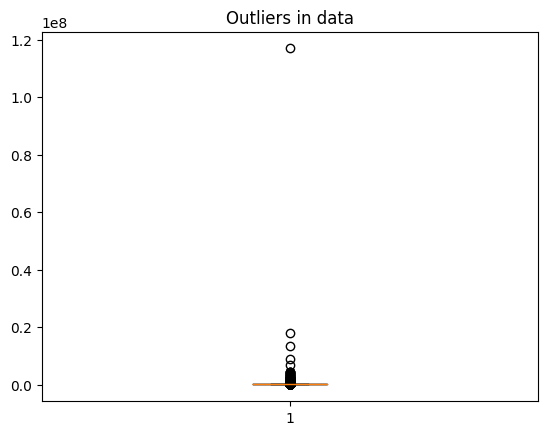

In [15]:
plt.boxplot(df['AMT_INCOME_TOTAL']);
plt.title('Outliers in data');

##### removing outliers

In [16]:
q3  = np.percentile(df['AMT_INCOME_TOTAL'],75)
q2 = np.percentile(df['AMT_INCOME_TOTAL'],25)
iqr = q3 -q2
ub = q3 +(1.5 * iqr)
lb = q2-(1.5 * iqr)

df  = df[(df['AMT_INCOME_TOTAL'] <= ub) & (df['AMT_INCOME_TOTAL'] >=lb)]

##### Plot after removing ouliers

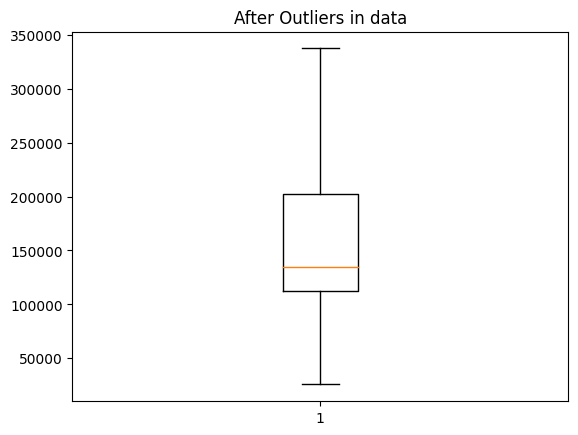

In [17]:
plt.boxplot(df['AMT_INCOME_TOTAL']);
plt.title('After Outliers in data');

#### Summary Statistics

In [18]:
df['AMT_INCOME_TOTAL'].describe()

count    293476.000000
mean     154263.935956
std       64014.949755
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      202500.000000
max      337500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

#### Data visualization 

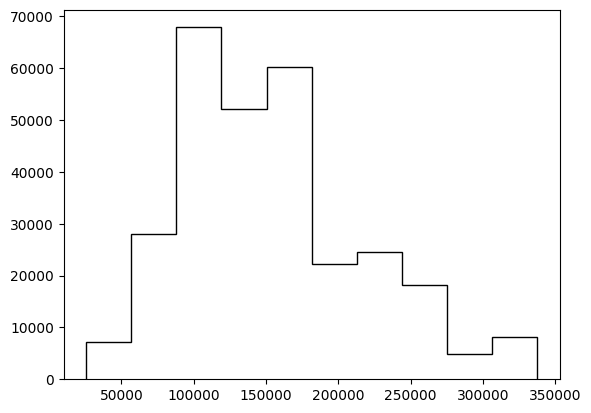

In [19]:
plt.hist(df['AMT_INCOME_TOTAL'],histtype='step',color = 'black');

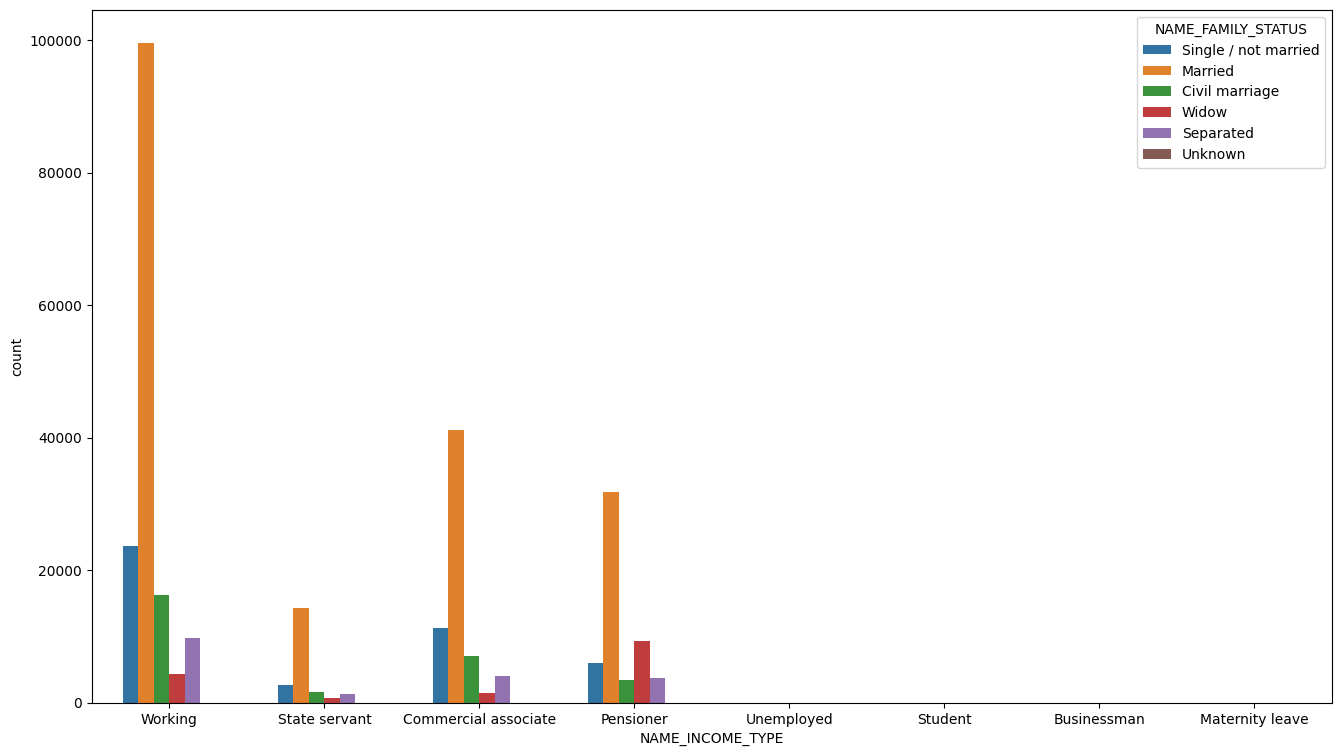

In [20]:
plt.figure(figsize =(16,9))
sns.countplot(df,x = "NAME_INCOME_TYPE",width = 0.6,hue = "NAME_FAMILY_STATUS");

# PlaygroundS4E06|OriginalData Data

In [21]:
df = pd.read_csv('/kaggle/input/playgrounds4e06originaldata/original.csv')

In [22]:
df.shape

(4424, 38)

In [23]:
df.size

168112

In [24]:
df_null= round(df.isnull().sum())
df_null

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

## There is no null value
### Data cleaning is not applicable

In [25]:
df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,2212.500000,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,1277.243125,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1106.750000,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,2212.500000,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,3318.250000,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,4424.000000,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


#### Workin on Admission grade column

In [26]:
df['Admission grade'].describe()

count    4424.000000
mean      126.978119
std        14.482001
min        95.000000
25%       117.900000
50%       126.100000
75%       134.800000
max       190.000000
Name: Admission grade, dtype: float64

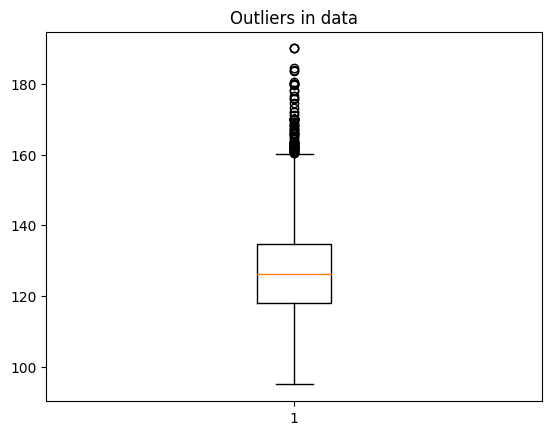

In [27]:
plt.boxplot(df['Admission grade']);
plt.title('Outliers in data');

In [28]:
# removing ouliers

In [29]:
q3  = np.percentile(df['Admission grade'],75)
q2 = np.percentile(df['Admission grade'],25)
iqr = q3 -q2
ub = q3 +(1.5 * iqr)
lb = q2-(1.5 * iqr)

df  = df[(df['Admission grade'] <= ub) & (df['Admission grade'] >=lb)]

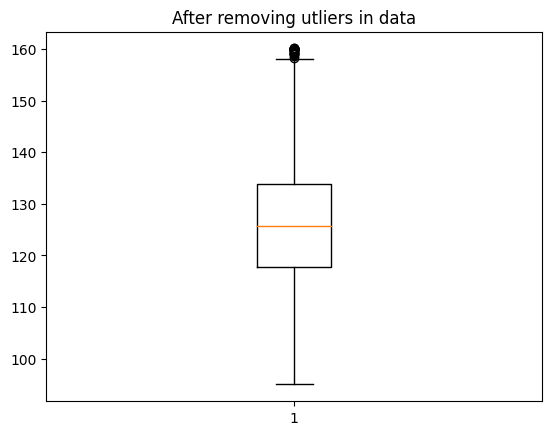

In [30]:
plt.boxplot(df['Admission grade']);
plt.title('After removing utliers in data');

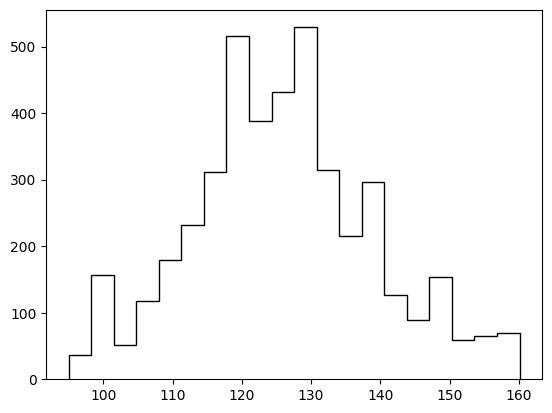

In [31]:
plt.hist(df['Admission grade'],histtype='step',color = 'black',bins = 20);

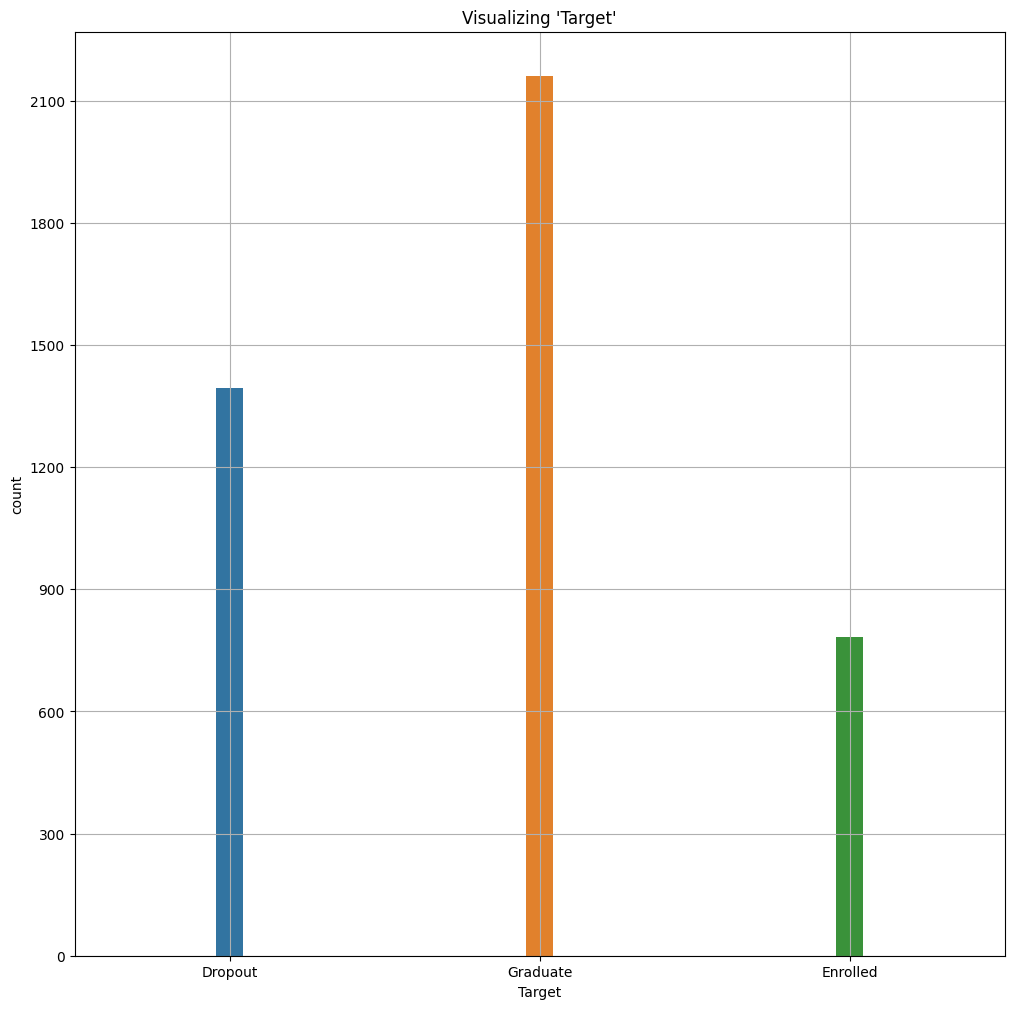

In [32]:
plt.figure(figsize = (12,12))
sns.countplot(df,x = 'Target',width = 0.090);
plt.yticks(range(0,2200,300))
plt.grid()
plt.title("Visualizing 'Target'");

# Automobile Sales data


In [33]:
df = pd.read_csv('/kaggle/input/auto-sales-data/Auto Sales data.csv')


In [34]:
df.shape

(2747, 20)

In [35]:
df.size

54940

In [36]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [37]:
df_null = round(df.isna().sum()*100/len(df),2)
df_null

ORDERNUMBER             0.0
QUANTITYORDERED         0.0
PRICEEACH               0.0
ORDERLINENUMBER         0.0
SALES                   0.0
ORDERDATE               0.0
DAYS_SINCE_LASTORDER    0.0
STATUS                  0.0
PRODUCTLINE             0.0
MSRP                    0.0
PRODUCTCODE             0.0
CUSTOMERNAME            0.0
PHONE                   0.0
ADDRESSLINE1            0.0
CITY                    0.0
POSTALCODE              0.0
COUNTRY                 0.0
CONTACTLASTNAME         0.0
CONTACTFIRSTNAME        0.0
DEALSIZE                0.0
dtype: float64

### There is no null column 
####  No Data cleaning 

#### Working on 'SALES' column

In [38]:
df['SALES'].describe()

count     2747.000000
mean      3553.047583
std       1838.953901
min        482.130000
25%       2204.350000
50%       3184.800000
75%       4503.095000
max      14082.800000
Name: SALES, dtype: float64

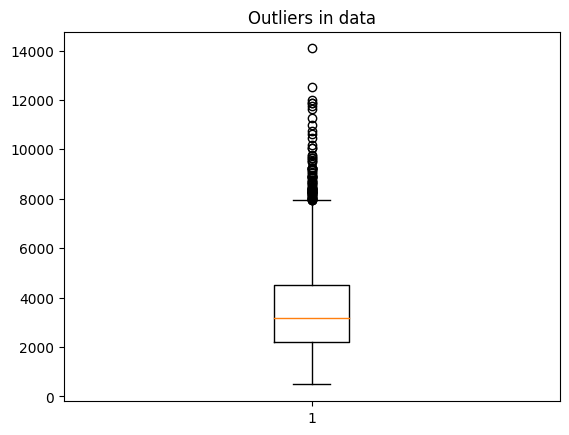

In [39]:
plt.boxplot(df['SALES']);
plt.title('Outliers in data');

#### Removing Outliers in 'SALES' column

In [40]:
q3  = np.percentile(df['SALES'],85)
q2 = np.percentile(df['SALES'],25)
iqr = q3 -q2
ub = q3 +(1.5 * iqr)
lb = q2-(1.5 * iqr)

df  = df[(df['SALES'] <= ub) & (df['SALES'] >=lb)]

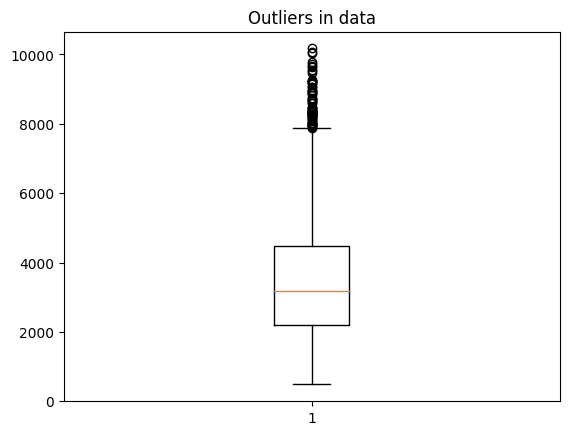

In [41]:
plt.boxplot(df['SALES']);
plt.title('Outliers in data');

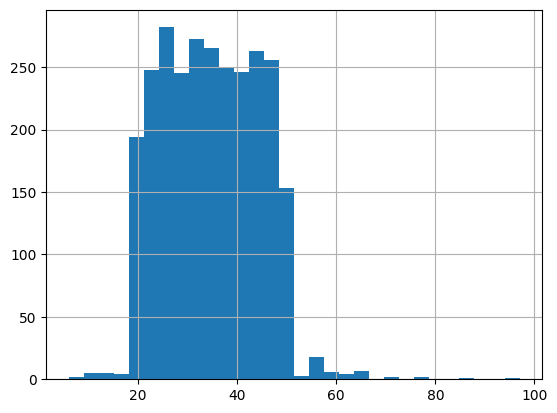

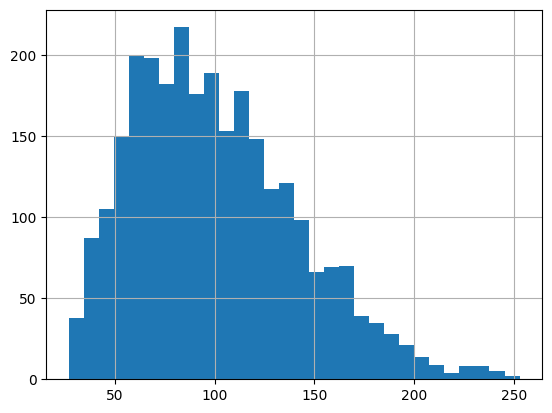

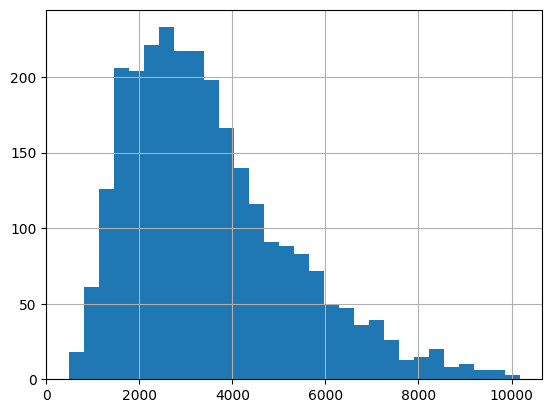

In [42]:

df['QUANTITYORDERED'].hist(bins=30)
plt.show()


df['PRICEEACH'].hist(bins=30)
plt.show()


df['SALES'].hist(bins=30)
plt.show()
